In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

import seaborn as sns
from copy import deepcopy

import itertools

sns.set_style("darkgrid")

def flatten(t):
    return [item for sublist in t for item in sublist]

pd.set_option('max_columns', None)

In [2]:
#results_complete = pd.read_csv('./results_complete.csv', delimiter=';')
#results_complete = results_complete[results_complete['i_net_nas'] == True]
#results_complete_columns = list(results_complete.columns)

results_summary = pd.read_csv('./results_summary.csv', delimiter=';')
#results_summary = results_summary[results_summary['i_net_nas'] == True]
results_summary_columns = list(results_summary.columns)

results_summary.head(5)

function_family_maximum_depth  function_family_beta  \
0                              4                     1   
1                              4                     1   
2                              4                     1   
3                              4                     1   
4                              4                     1   

   function_family_decision_sparsity  function_family_fully_grown  \
0                                 10                         True   
1                                  1                         True   
2                                  1                         True   
3                                  1                         True   
4                                  1                         True   

  function_family_dt_type  \
0                     SDT   
1                     SDT   
2                 vanilla   
3                 vanilla   
4                 vanilla   

   function_family_basic_function_representation_length  \
0                                                197      
1                                                197      
2                                                 46      
3                                                 46      
4                                                 46      

   function_family_function_representation_length  data_number_of_variables  \
0                                             197                        10   
1                                             197                        10   
2                                             466                        15   
3                                             526                        17   
4                                             316                        10   

   data_num_classes data_categorical_indices  \
0                 2                       []   
1                 2                       []   
2                 2                       []   
3                 2                       []   
4                 2                       []   

   data_random_parameters_distribution  data_max_distributions_per_class  \
0                                 True                                 0   
1                                 True                                 0   
2                                 True                                 0   
3                                 True                                 0   
4                                 True                                 0   

  data_dt_type_train  data_maximum_depth_train  data_decision_sparsity_train  \
0            vanilla                         4                             1   
1            vanilla                         4                             1   
2            vanilla                         4                             1   
3            vanilla                         4                             1   
4            vanilla                         4                             1   

  data_function_generation_type  data_objective  data_x_max  data_x_min  \
0                   distribtion  classification           1           0   
1                   distribtion  classification           1           0   
2                   distribtion  classification           1           0   
3                   distribtion  classification           1           0   
4                   distribtion  classification           1           0   

  data_x_distrib  data_lambda_dataset_size  data_noise_injected_level  \
0        uniform                      5000                          0   
1        uniform                      5000                          0   
2        uniform                      5000                          0   
3        uniform                      5000                          0   
4        uniform                      5000                          0   

  data_noise_injected_type  data_data_noise  lambda_net_epochs_lambda  \
0          flip_percentage              0.1 

In [3]:
colmuns_identifier = [
                  'function_family_maximum_depth',
                  'function_family_decision_sparsity', 
                  'function_family_dt_type',
                  'data_dt_type_train',
                  'data_maximum_depth_train',
                  'data_number_of_variables',
                  'data_noise_injected_level',
                  'data_function_generation_type',
                  'data_categorical_indices',
                  'lambda_net_lambda_network_layers',
                  'lambda_net_optimizer_lambda',
                  'i_net_dense_layers',
                  'i_net_dropout',
                  'i_net_learning_rate',
                  'i_net_loss',
                  'i_net_interpretation_dataset_size',
                  'i_net_function_representation_type',
                  'i_net_data_reshape_version',
                  'i_net_nas',
                  'i_net_nas_trials',
                  'evaluation_eval_data_description_eval_data_function_generation_type',
                  'evaluation_eval_data_description_eval_data_noise_injected_level',
                 ]


In [4]:
columns_inet = []
for column in results_summary_columns:
    if 'inet_scores' in column:
        columns_inet.append(column)
results_summary_inet = results_summary[flatten([colmuns_identifier, columns_inet])]

columns_inet_rename = []
for column in columns_inet:
    column = column.replace('inet_scores_', '')
    columns_inet_rename.append(column)

results_summary_inet.columns = flatten([colmuns_identifier, columns_inet_rename])

#results_summary_inet.insert(0, 'scores_type', 'inet_scores')
results_summary_inet.insert(0, 'scores_type', [dt_type + str(decision_sparsity) + '_inet_scores' for dt_type, decision_sparsity in zip(results_summary_inet['function_family_dt_type'].values, results_summary_inet['function_family_decision_sparsity'].values)])

    
print(results_summary_inet.shape)
results_summary_inet

(32, 393)


,scores_type,function_family_maximum_depth,function_family_decision_sparsity,function_family_dt_type,data_dt_type_train,data_maximum_depth_train,data_number_of_variables,data_noise_injected_level,data_function_generation_type,data_categorical_indices,lambda_net_lambda_network_layers,lambda_net_optimizer_lambda,i_net_dense_layers,i_net_dropout,i_net_learning_rate,i_net_loss,i_net_interpretation_dataset_size,i_net_function_representation_type,i_net_data_reshape_version,i_net_nas,i_net_nas_trials,evaluation_eval_data_description_eval_data_function_generation_type,evaluation_eval_data_description_eval_data_noise_injected_level,train_soft_binary_crossentropy,train_soft_binary_crossentropy_median,train_binary_crossentropy,train_binary_crossentropy_median,train_accuracy,train_accuracy_median,train_f1_score,train_f1_score_median,train_runtime,train_runtime_median,valid_soft_binary_crossentropy,valid_soft_binary_crossentropy_median,valid_binary_crossentropy,valid_binary_crossentropy_median,valid_accuracy,valid_accuracy_median,valid_f1_score,valid_f1_score_median,valid_runtime,valid_runtime_median,test_uniform_soft_binary_crossentropy,test_uniform_soft_binary_crossentropy_median,test_uniform_binary_crossentropy,test_uniform_binary_crossentropy_median,test_uniform_accuracy,test_uniform_accuracy_median,test_uniform_f1_score,test_uniform_f1_score_median,test_uniform_runtime,test_uniform_runtime_median,test_gamma_soft_binary_crossentropy,test_gamma_soft_binary_crossentropy_median,test_gamma_binary_crossentropy,test_gamma_binary_crossentropy_median,test_gamma_accuracy,test_gamma_accuracy_median,test_gamma_f1_score,test_gamma_f1_score_median,test_gamma_runtime,test_gamma_runtime_median,test_beta_soft_binary_crossentropy,test_beta_soft_binary_crossentropy_median,test_beta_binary_crossentropy,test_beta_binary_crossentropy_median,test_beta_accuracy,test_beta_accuracy_median,test_beta_f1_score,test_beta_f1_score_median,test_beta_runtime,test_beta_runtime_median,test_poisson_soft_binary_crossentropy,test_poisson_soft_binary_crossentropy_median,test_poisson_binary_crossentropy,test_poisson_binary_crossentropy_median,test_poisson_accuracy,test_poisson_accuracy_median,test_poisson_f1_score,test_poisson_f1_score_median,test_poisson_runtime,test_poisson_runtime_median,test_normal_soft_binary_crossentropy,test_normal_soft_binary_crossentropy_median,test_normal_binary_crossentropy,test_normal_binary_crossentropy_median,test_normal_accuracy,test_normal_accuracy_median,test_normal_f1_score,test_normal_f1_score_median,test_normal_runtime,test_normal_runtime_median,soft_binary_crossentropy_Adult_1000,binary_crossentropy_Adult_1000,accuracy_Adult_1000,f1_score_Adult_1000,runtime_Adult_1000,soft_binary_crossentropy_Titanic_1000,binary_crossentropy_Titanic_1000,accuracy_Titanic_1000,f1_score_Titanic_1000,runtime_Titanic_1000,soft_binary_crossentropy_Absenteeism_1000,binary_crossentropy_Absenteeism_1000,accuracy_Absenteeism_1000,f1_score_Absenteeism_1000,runtime_Absenteeism_1000,soft_binary_crossentropy_Loan House_1000,binary_crossentropy_Loan House_1000,accuracy_Loan House_1000,f1_score_Loan House_1000,runtime_Loan House_1000,soft_binary_crossentropy_Loan Credit_1000,binary_crossentropy_Loan Credit_1000,accuracy_Loan Credit_1000,f1_score_Loan Credit_1000,runtime_Loan Credit_1000,soft_binary_crossentropy_Medical Insurance_1000,binary_crossentropy_Medical Insurance_1000,accuracy_Medical Insurance_1000,f1_score_Medical Insurance_1000,runtime_Medical Insurance_1000,soft_binary_crossentropy_Bank Marketing_1000,binary_crossentropy_Bank Marketing_1000,accuracy_Bank Marketing_1000,f1_score_Bank Marketing_1000,runtime_Bank Marketing_1000,soft_binary_crossentropy_Brest Cancer Wisconsin_1000,binary_crossentropy_Brest Cancer Wisconsin_1000,accuracy_Brest Cancer Wisconsin_1000,f1_score_Brest Cancer Wisconsin_1000,runtime_Brest Cancer Wisconsin_1000,soft_binary_crossentropy_Wisconsin Diagnostic Breast Cancer_1000,binary_crossentropy_Wisconsin Diagnostic Breast Cancer_1000,ac

In [5]:
columns_dt_distilled = []
for column in results_summary_columns:
    if 'dt_scores' in column:
        if 'data_random' not in column:
            columns_dt_distilled.append(column)
results_summary_dt_distilled = results_summary[flatten([colmuns_identifier, columns_dt_distilled])]

columns_dt_distilled_rename = []
for column in columns_dt_distilled:
    column = column.replace('dt_scores_','')
    columns_dt_distilled_rename.append(column)

results_summary_dt_distilled.columns = flatten([colmuns_identifier, columns_dt_distilled_rename])
    
#results_summary_dt_distilled.insert(0, 'scores_type', 'dt_scores')
results_summary_dt_distilled.insert(0, 'scores_type', [dt_type + str(decision_sparsity) + '_dt_scores' for dt_type, decision_sparsity in zip(results_summary_dt_distilled['function_family_dt_type'].values, results_summary_dt_distilled['function_family_decision_sparsity'].values)])

    
print(results_summary_dt_distilled.shape)
results_summary_dt_distilled.head(5)


(32, 433)


,scores_type,function_family_maximum_depth,function_family_decision_sparsity,function_family_dt_type,data_dt_type_train,data_maximum_depth_train,data_number_of_variables,data_noise_injected_level,data_function_generation_type,data_categorical_indices,lambda_net_lambda_network_layers,lambda_net_optimizer_lambda,i_net_dense_layers,i_net_dropout,i_net_learning_rate,i_net_loss,i_net_interpretation_dataset_size,i_net_function_representation_type,i_net_data_reshape_version,i_net_nas,i_net_nas_trials,evaluation_eval_data_description_eval_data_function_generation_type,evaluation_eval_data_description_eval_data_noise_injected_level,train_soft_binary_crossentropy,train_soft_binary_crossentropy_median,train_binary_crossentropy,train_binary_crossentropy_median,train_accuracy,train_accuracy_median,train_f1_score,train_f1_score_median,train_runtime,train_runtime_median,valid_soft_binary_crossentropy,valid_soft_binary_crossentropy_median,valid_binary_crossentropy,valid_binary_crossentropy_median,valid_accuracy,valid_accuracy_median,valid_f1_score,valid_f1_score_median,valid_runtime,valid_runtime_median,test_uniform_soft_binary_crossentropy,test_uniform_soft_binary_crossentropy_median,test_uniform_binary_crossentropy,test_uniform_binary_crossentropy_median,test_uniform_accuracy,test_uniform_accuracy_median,test_uniform_f1_score,test_uniform_f1_score_median,test_uniform_runtime,test_uniform_runtime_median,test_uniform_soft_binary_crossentropy_train_data,test_uniform_soft_binary_crossentropy_train_data_median,test_uniform_binary_crossentropy_train_data,test_uniform_binary_crossentropy_train_data_median,test_uniform_accuracy_train_data,test_uniform_accuracy_train_data_median,test_uniform_f1_score_train_data,test_uniform_f1_score_train_data_median,test_gamma_soft_binary_crossentropy,test_gamma_soft_binary_crossentropy_median,test_gamma_binary_crossentropy,test_gamma_binary_crossentropy_median,test_gamma_accuracy,test_gamma_accuracy_median,test_gamma_f1_score,test_gamma_f1_score_median,test_gamma_runtime,test_gamma_runtime_median,test_gamma_soft_binary_crossentropy_train_data,test_gamma_soft_binary_crossentropy_train_data_median,test_gamma_binary_crossentropy_train_data,test_gamma_binary_crossentropy_train_data_median,test_gamma_accuracy_train_data,test_gamma_accuracy_train_data_median,test_gamma_f1_score_train_data,test_gamma_f1_score_train_data_median,test_beta_soft_binary_crossentropy,test_beta_soft_binary_crossentropy_median,test_beta_binary_crossentropy,test_beta_binary_crossentropy_median,test_beta_accuracy,test_beta_accuracy_median,test_beta_f1_score,test_beta_f1_score_median,test_beta_runtime,test_beta_runtime_median,test_beta_soft_binary_crossentropy_train_data,test_beta_soft_binary_crossentropy_train_data_median,test_beta_binary_crossentropy_train_data,test_beta_binary_crossentropy_train_data_median,test_beta_accuracy_train_data,test_beta_accuracy_train_data_median,test_beta_f1_score_train_data,test_beta_f1_score_train_data_median,test_poisson_soft_binary_crossentropy,test_poisson_soft_binary_crossentropy_median,test_poisson_binary_crossentropy,test_poisson_binary_crossentropy_median,test_poisson_accuracy,test_poisson_accuracy_median,test_poisson_f1_score,test_poisson_f1_score_median,test_poisson_runtime,test_poisson_runtime_median,test_poisson_soft_binary_crossentropy_train_data,test_poisson_soft_binary_crossentropy_train_data_median,test_poisson_binary_crossentropy_train_data,test_poisson_binary_crossentropy_train_data_median,test_poisson_accuracy_train_data,test_poisson_accuracy_train_data_median,test_poisson_f1_score_train_data,test_poisson_f1_score_train_data_median,test_normal_soft_binary_crossentropy,test_normal_soft_binary_crossentropy_median,test_normal_binary_crossentropy,test_normal_binary_crossentropy_median,test_normal_accuracy,test_normal_accuracy_median,test_normal_f1_score,test_normal_f1_score_median,test_normal_runtime,test_normal_runtime_median,test_normal_soft_binary_crossentropy_train_data,test_normal_soft_binary_cros

In [6]:
columns_dt_distilled_random_data = []
for column in results_summary_columns:
    if 'dt_scores' in column:
        if 'runtime' not in column:
            if 'data_random' in column:
                columns_dt_distilled_random_data.append(column)
        else: 
            columns_dt_distilled_random_data.append(column)
results_summary_dt_distilled_random_data = results_summary[flatten([colmuns_identifier, columns_dt_distilled_random_data])]

columns_dt_distilled_random_data_rename = []
for column in columns_dt_distilled_random_data:
    column = column.replace('dt_scores_','')
    column = column.replace('_data_random','')
    columns_dt_distilled_random_data_rename.append(column)

results_summary_dt_distilled_random_data.columns = flatten([colmuns_identifier, columns_dt_distilled_random_data_rename])

#results_summary_dt_distilled_random_data.insert(0, 'scores_type', 'dt_scores_data_random')
results_summary_dt_distilled_random_data.insert(0, 'scores_type', [dt_type + str(decision_sparsity) + '_dt_scores_data_random' for dt_type, decision_sparsity in zip(results_summary_dt_distilled_random_data['function_family_dt_type'].values, results_summary_dt_distilled_random_data['function_family_decision_sparsity'].values)])


print(results_summary_dt_distilled_random_data.shape)
results_summary_dt_distilled_random_data.head(5)

(32, 393)


,scores_type,function_family_maximum_depth,function_family_decision_sparsity,function_family_dt_type,data_dt_type_train,data_maximum_depth_train,data_number_of_variables,data_noise_injected_level,data_function_generation_type,data_categorical_indices,lambda_net_lambda_network_layers,lambda_net_optimizer_lambda,i_net_dense_layers,i_net_dropout,i_net_learning_rate,i_net_loss,i_net_interpretation_dataset_size,i_net_function_representation_type,i_net_data_reshape_version,i_net_nas,i_net_nas_trials,evaluation_eval_data_description_eval_data_function_generation_type,evaluation_eval_data_description_eval_data_noise_injected_level,train_soft_binary_crossentropy,train_soft_binary_crossentropy_median,train_binary_crossentropy,train_binary_crossentropy_median,train_accuracy,train_accuracy_median,train_f1_score,train_f1_score_median,train_runtime,train_runtime_median,valid_soft_binary_crossentropy,valid_soft_binary_crossentropy_median,valid_binary_crossentropy,valid_binary_crossentropy_median,valid_accuracy,valid_accuracy_median,valid_f1_score,valid_f1_score_median,valid_runtime,valid_runtime_median,test_uniform_soft_binary_crossentropy,test_uniform_soft_binary_crossentropy_median,test_uniform_binary_crossentropy,test_uniform_binary_crossentropy_median,test_uniform_accuracy,test_uniform_accuracy_median,test_uniform_f1_score,test_uniform_f1_score_median,test_uniform_runtime,test_uniform_runtime_median,test_gamma_soft_binary_crossentropy,test_gamma_soft_binary_crossentropy_median,test_gamma_binary_crossentropy,test_gamma_binary_crossentropy_median,test_gamma_accuracy,test_gamma_accuracy_median,test_gamma_f1_score,test_gamma_f1_score_median,test_gamma_runtime,test_gamma_runtime_median,test_beta_soft_binary_crossentropy,test_beta_soft_binary_crossentropy_median,test_beta_binary_crossentropy,test_beta_binary_crossentropy_median,test_beta_accuracy,test_beta_accuracy_median,test_beta_f1_score,test_beta_f1_score_median,test_beta_runtime,test_beta_runtime_median,test_poisson_soft_binary_crossentropy,test_poisson_soft_binary_crossentropy_median,test_poisson_binary_crossentropy,test_poisson_binary_crossentropy_median,test_poisson_accuracy,test_poisson_accuracy_median,test_poisson_f1_score,test_poisson_f1_score_median,test_poisson_runtime,test_poisson_runtime_median,test_normal_soft_binary_crossentropy,test_normal_soft_binary_crossentropy_median,test_normal_binary_crossentropy,test_normal_binary_crossentropy_median,test_normal_accuracy,test_normal_accuracy_median,test_normal_f1_score,test_normal_f1_score_median,test_normal_runtime,test_normal_runtime_median,soft_binary_crossentropy_Adult_1000,binary_crossentropy_Adult_1000,accuracy_Adult_1000,f1_score_Adult_1000,runtime_Adult_1000,soft_binary_crossentropy_Titanic_1000,binary_crossentropy_Titanic_1000,accuracy_Titanic_1000,f1_score_Titanic_1000,runtime_Titanic_1000,soft_binary_crossentropy_Absenteeism_1000,binary_crossentropy_Absenteeism_1000,accuracy_Absenteeism_1000,f1_score_Absenteeism_1000,runtime_Absenteeism_1000,soft_binary_crossentropy_Loan House_1000,binary_crossentropy_Loan House_1000,accuracy_Loan House_1000,f1_score_Loan House_1000,runtime_Loan House_1000,soft_binary_crossentropy_Loan Credit_1000,binary_crossentropy_Loan Credit_1000,accuracy_Loan Credit_1000,f1_score_Loan Credit_1000,runtime_Loan Credit_1000,soft_binary_crossentropy_Medical Insurance_1000,binary_crossentropy_Medical Insurance_1000,accuracy_Medical Insurance_1000,f1_score_Medical Insurance_1000,runtime_Medical Insurance_1000,soft_binary_crossentropy_Bank Marketing_1000,binary_crossentropy_Bank Marketing_1000,accuracy_Bank Marketing_1000,f1_score_Bank Marketing_1000,runtime_Bank Marketing_1000,soft_binary_crossentropy_Brest Cancer Wisconsin_1000,binary_crossentropy_Brest Cancer Wisconsin_1000,accuracy_Brest Cancer Wisconsin_1000,f1_score_Brest Cancer Wisconsin_1000,runtime_Brest Cancer Wisconsin_1000,soft_binary_crossentropy_Wisconsin Diagnostic Breast Cancer_1000,binary_crossentropy_Wisconsin Diagnostic Breast Cancer_1000,ac

In [7]:
results_summary_reduced = pd.concat([
                                     results_summary_inet, 
                                     results_summary_dt_distilled, 
                                     #results_summary_dt_distilled_random_data
                                    ]).reset_index(drop=True)
results_summary_reduced_columns = results_summary_reduced.columns
results_summary_reduced.head(5)

,scores_type,function_family_maximum_depth,function_family_decision_sparsity,function_family_dt_type,data_dt_type_train,data_maximum_depth_train,data_number_of_variables,data_noise_injected_level,data_function_generation_type,data_categorical_indices,lambda_net_lambda_network_layers,lambda_net_optimizer_lambda,i_net_dense_layers,i_net_dropout,i_net_learning_rate,i_net_loss,i_net_interpretation_dataset_size,i_net_function_representation_type,i_net_data_reshape_version,i_net_nas,i_net_nas_trials,evaluation_eval_data_description_eval_data_function_generation_type,evaluation_eval_data_description_eval_data_noise_injected_level,train_soft_binary_crossentropy,train_soft_binary_crossentropy_median,train_binary_crossentropy,train_binary_crossentropy_median,train_accuracy,train_accuracy_median,train_f1_score,train_f1_score_median,train_runtime,train_runtime_median,valid_soft_binary_crossentropy,valid_soft_binary_crossentropy_median,valid_binary_crossentropy,valid_binary_crossentropy_median,valid_accuracy,valid_accuracy_median,valid_f1_score,valid_f1_score_median,valid_runtime,valid_runtime_median,test_uniform_soft_binary_crossentropy,test_uniform_soft_binary_crossentropy_median,test_uniform_binary_crossentropy,test_uniform_binary_crossentropy_median,test_uniform_accuracy,test_uniform_accuracy_median,test_uniform_f1_score,test_uniform_f1_score_median,test_uniform_runtime,test_uniform_runtime_median,test_gamma_soft_binary_crossentropy,test_gamma_soft_binary_crossentropy_median,test_gamma_binary_crossentropy,test_gamma_binary_crossentropy_median,test_gamma_accuracy,test_gamma_accuracy_median,test_gamma_f1_score,test_gamma_f1_score_median,test_gamma_runtime,test_gamma_runtime_median,test_beta_soft_binary_crossentropy,test_beta_soft_binary_crossentropy_median,test_beta_binary_crossentropy,test_beta_binary_crossentropy_median,test_beta_accuracy,test_beta_accuracy_median,test_beta_f1_score,test_beta_f1_score_median,test_beta_runtime,test_beta_runtime_median,test_poisson_soft_binary_crossentropy,test_poisson_soft_binary_crossentropy_median,test_poisson_binary_crossentropy,test_poisson_binary_crossentropy_median,test_poisson_accuracy,test_poisson_accuracy_median,test_poisson_f1_score,test_poisson_f1_score_median,test_poisson_runtime,test_poisson_runtime_median,test_normal_soft_binary_crossentropy,test_normal_soft_binary_crossentropy_median,test_normal_binary_crossentropy,test_normal_binary_crossentropy_median,test_normal_accuracy,test_normal_accuracy_median,test_normal_f1_score,test_normal_f1_score_median,test_normal_runtime,test_normal_runtime_median,soft_binary_crossentropy_Adult_1000,binary_crossentropy_Adult_1000,accuracy_Adult_1000,f1_score_Adult_1000,runtime_Adult_1000,soft_binary_crossentropy_Titanic_1000,binary_crossentropy_Titanic_1000,accuracy_Titanic_1000,f1_score_Titanic_1000,runtime_Titanic_1000,soft_binary_crossentropy_Absenteeism_1000,binary_crossentropy_Absenteeism_1000,accuracy_Absenteeism_1000,f1_score_Absenteeism_1000,runtime_Absenteeism_1000,soft_binary_crossentropy_Loan House_1000,binary_crossentropy_Loan House_1000,accuracy_Loan House_1000,f1_score_Loan House_1000,runtime_Loan House_1000,soft_binary_crossentropy_Loan Credit_1000,binary_crossentropy_Loan Credit_1000,accuracy_Loan Credit_1000,f1_score_Loan Credit_1000,runtime_Loan Credit_1000,soft_binary_crossentropy_Medical Insurance_1000,binary_crossentropy_Medical Insurance_1000,accuracy_Medical Insurance_1000,f1_score_Medical Insurance_1000,runtime_Medical Insurance_1000,soft_binary_crossentropy_Bank Marketing_1000,binary_crossentropy_Bank Marketing_1000,accuracy_Bank Marketing_1000,f1_score_Bank Marketing_1000,runtime_Bank Marketing_1000,soft_binary_crossentropy_Brest Cancer Wisconsin_1000,binary_crossentropy_Brest Cancer Wisconsin_1000,accuracy_Brest Cancer Wisconsin_1000,f1_score_Brest Cancer Wisconsin_1000,runtime_Brest Cancer Wisconsin_1000,soft_binary_crossentropy_Wisconsin Diagnostic Breast Cancer_1000,binary_crossentropy_Wisconsin Diagnostic Breast Cancer_1000,ac

In [8]:
colmuns_identifier.append('scores_type')
not_considered_random_dataset_sizes = ['1000', '100000', '1000000']

In [9]:
def get_results_summary_reduced_for_metric(config, metric='accuracy', soft=False):
    
    results_summary_reduced_metric_columns = []
    for column in results_summary_reduced_columns:  
        if metric in column:
            if 'soft' not in column and not soft:           
                if 'median' not in column:
                    tokens = column.split('_')
                    integer = [token for token in tokens if token.isdigit()]
                    if len(integer) > 0:
                        integer = integer[0]
                        if integer not in not_considered_random_dataset_sizes:                    
                            results_summary_reduced_metric_columns.append(column)
                    else:
                        if 'TRAIN_DATA' not in column:
                            results_summary_reduced_metric_columns.append(column)

    results_summary_reduced_metric_with_identifier_columns = flatten([colmuns_identifier, results_summary_reduced_metric_columns])
    results_summary_reduced_metric_with_identifier = results_summary_reduced[results_summary_reduced_metric_with_identifier_columns]
    results_summary_reduced_metric_with_identifier.head(5)    
    
    
    results_summary_reduced_metric_plot = results_summary_reduced_metric_with_identifier

    try:
        results_summary_reduced_metric_plot = results_summary_reduced_metric_plot[results_summary_reduced_metric_plot['i_net_nas'] == config['nas']]
    except:
        pass
    
    if config['nas'] == True:
        try:
            results_summary_reduced_metric_plot = results_summary_reduced_metric_plot[results_summary_reduced_metric_plot['i_net_nas_trials'] == config['nas_trials']]
        except:
            pass    
    else:
        try:
            results_summary_reduced_metric_plot = results_summary_reduced_metric_plot[results_summary_reduced_metric_plot['i_net_dense_layers'] == config['inet_structure']]
        except:
            pass
    
    try:
        results_summary_reduced_metric_plot = results_summary_reduced_metric_plot[results_summary_reduced_metric_plot['i_net_loss'] == config['loss']]
    except:
        pass
    
    try:
        results_summary_reduced_metric_plot = results_summary_reduced_metric_plot[results_summary_reduced_metric_plot['data_noise_injected_level'] == config['noise_injected_level']]
    except:
        pass
    try:
        results_summary_reduced_metric_plot = results_summary_reduced_metric_plot[results_summary_reduced_metric_plot['data_categorical_indices'] == config['categorical_indices']]
    except:
        pass    
    try:
        results_summary_reduced_metric_plot = results_summary_reduced_metric_plot[results_summary_reduced_metric_plot['i_net_data_reshape_version'] == config['data_reshape_version']]
    except:
        pass
    try:
        results_summary_reduced_metric_plot = results_summary_reduced_metric_plot[results_summary_reduced_metric_plot['data_function_generation_type'] == config['function_generation_type']]
    except:
        pass        
        
    results_summary_reduced_metric_plot = results_summary_reduced_metric_plot[results_summary_reduced_metric_plot['data_number_of_variables'].isin(config['number_of_variables'])]
    results_summary_reduced_metric_plot = results_summary_reduced_metric_plot[results_summary_reduced_metric_plot['function_family_maximum_depth'].isin(config['maximum_depth'])]

    results_summary_reduced_metric_plot_columns = list(results_summary_reduced_metric_plot.columns)
    result_columns = []
    identifier_columns = []
    for column in results_summary_reduced_metric_plot_columns:
        if metric in column:
            result_columns.append(column)
        else:
            identifier_columns.append(column)
    number_of_results = results_summary_reduced_metric_plot.shape[0]

    results_summary_reduced_metric_plot_single_column_identifier = pd.concat([results_summary_reduced_metric_plot[identifier_columns] for _ in range(len(result_columns))], axis=0)
    results_summary_reduced_metric_plot_single_column_identifier['result_identifier'] = flatten([[result_column]*number_of_results for result_column in result_columns])
    #results_summary_reduced_metric_plot_single_column_identifier['result_identifier'] = flatten([[i]*number_of_results for i in range(len(result_columns))])

    results_summary_reduced_metric_plot_single_column_results = pd.concat([results_summary_reduced_metric_plot[result_column] for result_column in result_columns], axis=0)
    results_summary_reduced_metric_plot_single_column_results.name = 'score'

    results_summary_reduced_metric_plot = pd.concat([results_summary_reduced_metric_plot_single_column_identifier, results_summary_reduced_metric_plot_single_column_results], axis=1)

    results_summary_reduced_metric_plot = results_summary_reduced_metric_plot.sort_values(by=['function_family_dt_type', 'function_family_decision_sparsity'], ascending=(False, True))
    
    
    return results_summary_reduced_metric_plot
    

In [10]:
def plot_results(data_reduced, col, x, y, hue, plot_type=sns.barplot):
    
    #sns.set(rc={'figure.figsize':(20,10)})
    
    g = sns.FacetGrid(data_reduced, 
                      col=col,
                      ##hue='scores_type', 
                      #height=5, 
                      col_wrap=2,
                      aspect=1.5,
                      ##legend_out=False,
                     )
    g.map(plot_type, 
          x, 
          y, 
          hue,
          hue_order=np.unique(data_reduced[hue]),
          ##figsize=(20,10),
          palette=sns.color_palette(),#'colorblind'
          ##order=np.unique(results_summary_reduced_accuracy_plot["scores_type"]),
         )
    g.add_legend(fontsize=12,
               ncol=3,
               bbox_to_anchor=(0.5, -0.025),
               borderaxespad=0)    
    
    return plt.gcf()

In [11]:
figsize = (20, 10)
font_scale = 2.5

legend_fontsize = 25
legend_loc = 2

color_1 = '#84b7e9'#'#c0d6ff'
color_2 = '#0a6fd3'#'#96bcff'
color_3 = '#06427e'#'#6ca1ff'

In [12]:
datasets = {
            'Adult': 65,
            'Titanic': 9,
            'Absenteeism': 15,
            'Loan House': 17,
            'Loan Credit': 32,
            'Medical Insurance': 6,
            'Bank Marketing': 17,
            'Brest Cancer Wisconsin': 9,
            'Wisconsin Diagnostic Breast Cancer': 10,
            'Wisconsin Prognostic Breast Cancer': 10,
            'Abalone': 10,
            'Car': 21,
           }

/home/smarton/anaconda3/envs/XAI/lib/python3.8/site-packages/seaborn/axisgrid.py:670: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/home/smarton/anaconda3/envs/XAI/lib/python3.8/site-packages/seaborn/axisgrid.py:670: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/home/smarton/anaconda3/envs/XAI/lib/python3.8/site-packages/seaborn/axisgrid.py:670: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


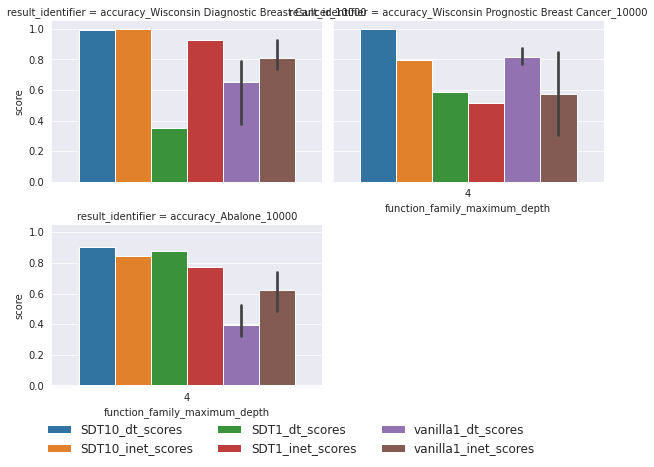

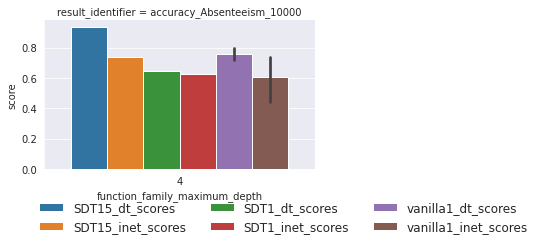

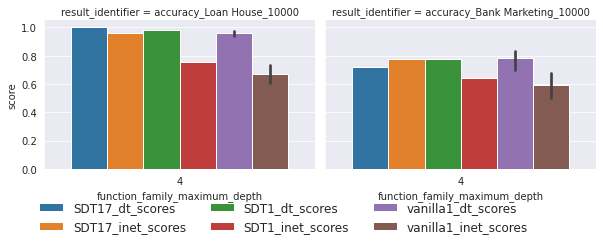

In [13]:
for unique_value in np.unique(list(datasets.values())):
    
    key_list = []
    for key, value in datasets.items():
        if unique_value == value:
            key_list.append(key)
    
    try:        
        config = {
            #'inet_structure': '[1024, 1024, 256, 2048, 2048]',
            'loss': 'binary_crossentropy', # 'binary_crossentropy', 'soft_binary_crossentropy'

            'noise_injected_level': 0, #0, 0.2
            #'data_noise': 0.1,
            
            'data_reshape_version': 'None', #'None', '3' =autoencode
            #'function_generation_type': 'random_decision_tree_trained', #make_classification_trained, random_decision_tree_trained

            'nas': False, # 'True', 'False'
            'nas_trials': 20, #20, 100

            'number_of_variables': [unique_value], # [10]
            'maximum_depth': [3, 4, 5], # [3, 4, 5]
        }

        results_summary_reduced_accuracy_plot = get_results_summary_reduced_for_metric(config, metric='accuracy', soft=False)

        
        plot_data = results_summary_reduced_accuracy_plot[results_summary_reduced_accuracy_plot['result_identifier'].str.contains('|'.join(key_list))]
        plot = plot_results(
                             data_reduced=plot_data,
                             col='result_identifier',
                             x='function_family_maximum_depth',
                             y='score',
                             hue='scores_type',
                             plot_type=sns.barplot
                            )    
    except AttributeError:
        pass
    

In [14]:
plot_data[plot_data['result_identifier'] == 'accuracy_Bank Marketing_10000']

,function_family_maximum_depth,function_family_decision_sparsity,function_family_dt_type,data_dt_type_train,data_maximum_depth_train,data_number_of_variables,data_noise_injected_level,data_function_generation_type,data_categorical_indices,lambda_net_lambda_network_layers,lambda_net_optimizer_lambda,i_net_dense_layers,i_net_dropout,i_net_learning_rate,i_net_loss,i_net_interpretation_dataset_size,i_net_function_representation_type,i_net_data_reshape_version,i_net_nas,i_net_nas_trials,evaluation_eval_data_description_eval_data_function_generation_type,evaluation_eval_data_description_eval_data_noise_injected_level,scores_type,result_identifier,score
3,4,1,vanilla,vanilla,4,17,0,distribtion,[],[128],adam,"[768, 1920]","[0.0, 0.0]",0.001,binary_crossentropy,25000,3,None,False,60,make_classification,0,vanilla1_inet_scores,accuracy_Bank Marketing_10000,0.752820
13,4,1,vanilla,vanilla,4,17,0,distribtion,[],[128],adam,"[768, 1920]","[0.0, 0.0]",0.001,binary_crossentropy,20000,3,None,False,60,make_classification,0,vanilla1_inet_scores,accuracy_Bank Marketing_10000,0.237337
17,4,1,vanilla,vanilla,4,17,0,distribtion,[],[128],adam,"[768, 1920]","[0.0, 0.0]",0.001,binary_crossentropy,20000,3,None,False,60,make_classification,0,vanilla1_inet_scores,accuracy_Bank Marketing_10000,0.753594
20,4,1,vanilla,vanilla,4,17,0,distribtion,[],[128],adam,"[768, 1920]","[0.0, 0.0]",0.001,binary_crossentropy,20000,3,None,False,60,make_classification,0,vanilla1_inet_scores,accuracy_Bank Marketing_10000,0.346937
21,4,1,vanilla,vanilla,4,17,0,distribtion,[],[128],adam,"[768, 1920]","[0.0, 0.0]",0.001,binary_crossentropy,20000,3,None,False,60,make_classification,0,vanilla1_inet_scores,accuracy_Bank Marketing_10000,0.479872
22,4,1,vanilla,vanilla,4,17,0,distribtion,[],[128],adam,"[1856, 512]","[0.0, 0.0]",0.001,binary_crossentropy,25000,3,None,False,60,make_classification,0,vanilla1_inet_scores,accuracy_Bank Marketing_10000,0.728047
23,4,1,vanilla,vanilla,4,17,0,distribtion,[],[128],adam,"[768, 1920]","[0.0, 0.0]",0.001,binary_crossentropy,25000,3,None,False,60,make_classification,0,vanilla1_inet_scores,accuracy_Bank Marketing_10000,0.731365
24,4,1,vanilla,vanilla,4,17,0,distribtion,[],[128],adam,"[768, 1920]","[0.0, 0.0]",0.001,binary_crossentropy,20000,3,None,False,60,make_classification,0,vanilla1_inet_scores,accuracy_Bank Marketing_10000,0.355895
25,4,1,vanilla,vanilla,4,17,0,distribtion,[],[128],adam,"[768, 1920]","[0.0, 0.0]",0.001,binary_crossentropy,20000,3,None,False,60,make_classification,0,vanilla1_inet_scores,accuracy_Bank Marketing_10000,0.369830
26,4,1,vanilla,vanilla,4,17,0,distribtion,[],[128],adam,"[1856, 512]","[0.0, 0.0]",0.001,binary_crossentropy,25000,3,None,False,60,make_classification,0,vanilla1_inet_scores,accuracy_Bank Marketing_10000,0.740102


In [15]:
plot_data[plot_data['result_identifier'] == 'accuracy_Loan House_10000']

,function_family_maximum_depth,function_family_decision_sparsity,function_family_dt_type,data_dt_type_train,data_maximum_depth_train,data_number_of_variables,data_noise_injected_level,data_function_generation_type,data_categorical_indices,lambda_net_lambda_network_layers,lambda_net_optimizer_lambda,i_net_dense_layers,i_net_dropout,i_net_learning_rate,i_net_loss,i_net_interpretation_dataset_size,i_net_function_representation_type,i_net_data_reshape_version,i_net_nas,i_net_nas_trials,evaluation_eval_data_description_eval_data_function_generation_type,evaluation_eval_data_description_eval_data_noise_injected_level,scores_type,result_identifier,score
3,4,1,vanilla,vanilla,4,17,0,distribtion,[],[128],adam,"[768, 1920]","[0.0, 0.0]",0.001,binary_crossentropy,25000,3,None,False,60,make_classification,0,vanilla1_inet_scores,accuracy_Loan House_10000,0.745902
13,4,1,vanilla,vanilla,4,17,0,distribtion,[],[128],adam,"[768, 1920]","[0.0, 0.0]",0.001,binary_crossentropy,20000,3,None,False,60,make_classification,0,vanilla1_inet_scores,accuracy_Loan House_10000,0.516393
17,4,1,vanilla,vanilla,4,17,0,distribtion,[],[128],adam,"[768, 1920]","[0.0, 0.0]",0.001,binary_crossentropy,20000,3,None,False,60,make_classification,0,vanilla1_inet_scores,accuracy_Loan House_10000,0.770492
20,4,1,vanilla,vanilla,4,17,0,distribtion,[],[128],adam,"[768, 1920]","[0.0, 0.0]",0.001,binary_crossentropy,20000,3,None,False,60,make_classification,0,vanilla1_inet_scores,accuracy_Loan House_10000,0.540984
21,4,1,vanilla,vanilla,4,17,0,distribtion,[],[128],adam,"[768, 1920]","[0.0, 0.0]",0.001,binary_crossentropy,20000,3,None,False,60,make_classification,0,vanilla1_inet_scores,accuracy_Loan House_10000,0.672131
22,4,1,vanilla,vanilla,4,17,0,distribtion,[],[128],adam,"[1856, 512]","[0.0, 0.0]",0.001,binary_crossentropy,25000,3,None,False,60,make_classification,0,vanilla1_inet_scores,accuracy_Loan House_10000,0.672131
23,4,1,vanilla,vanilla,4,17,0,distribtion,[],[128],adam,"[768, 1920]","[0.0, 0.0]",0.001,binary_crossentropy,25000,3,None,False,60,make_classification,0,vanilla1_inet_scores,accuracy_Loan House_10000,0.770492
24,4,1,vanilla,vanilla,4,17,0,distribtion,[],[128],adam,"[768, 1920]","[0.0, 0.0]",0.001,binary_crossentropy,20000,3,None,False,60,make_classification,0,vanilla1_inet_scores,accuracy_Loan House_10000,0.540984
25,4,1,vanilla,vanilla,4,17,0,distribtion,[],[128],adam,"[768, 1920]","[0.0, 0.0]",0.001,binary_crossentropy,20000,3,None,False,60,make_classification,0,vanilla1_inet_scores,accuracy_Loan House_10000,0.672131
26,4,1,vanilla,vanilla,4,17,0,distribtion,[],[128],adam,"[1856, 512]","[0.0, 0.0]",0.001,binary_crossentropy,25000,3,None,False,60,make_classification,0,vanilla1_inet_scores,accuracy_Loan House_10000,0.672131


/home/smarton/anaconda3/envs/XAI/lib/python3.8/site-packages/seaborn/axisgrid.py:670: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


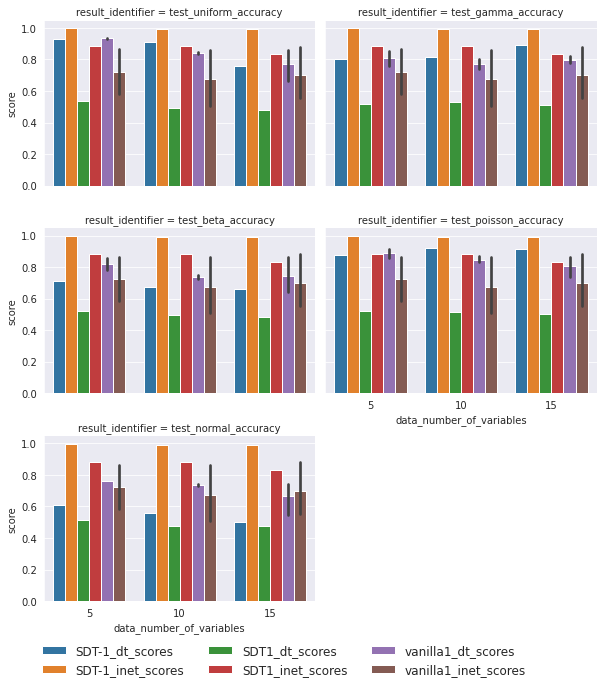

In [16]:
metric = 'accuracy'
key_list = ['uniform', 'normal', 'gamma', 'beta', 'poisson']

key_list = ['test_' + key + '_' + metric  for key in key_list]

try:        
    config = {
        #'inet_structure': '[1024, 1024, 256, 2048, 2048]',
        'loss': 'binary_crossentropy', # 'binary_crossentropy', 'soft_binary_crossentropy'

        'noise_injected_level': 0, #0, 0.2
        'data_noise': 0.1,
        #'categorical_indices': '[]',#'[0, 1, 2, 3]',
        'data_reshape_version': 'None', #'None', '3' =autoencode
        #'function_generation_type': 'random_decision_tree_trained', #make_classification_trained, random_decision_tree_trained

        'nas': False, # 'True', 'False'
        'nas_trials': 20, #20, 100

        'number_of_variables': [5, 10, 15], # [10]
        'maximum_depth': [4], # [3, 4, 5]
    }

    results_summary_reduced_accuracy_plot = get_results_summary_reduced_for_metric(config, metric=metric, soft=False)
    
    scores_type_adjusted = results_summary_reduced_accuracy_plot['scores_type'].values
    scores_type_adjusted = [string.replace('SDT10', 'SDT-1') for string in scores_type_adjusted]
    scores_type_adjusted = [string.replace('SDT5', 'SDT-1') for string in scores_type_adjusted]
    scores_type_adjusted = [string.replace('SDT15', 'SDT-1') for string in scores_type_adjusted]
    results_summary_reduced_accuracy_plot['scores_type'] = scores_type_adjusted    

    plot_data = results_summary_reduced_accuracy_plot[results_summary_reduced_accuracy_plot['result_identifier'].str.contains('|'.join(key_list))]
    plot_data = plot_data[~plot_data['result_identifier'].str.contains('train_data')]
    plot = plot_results(
                         data_reduced=plot_data,
                         col='result_identifier',
                         x='data_number_of_variables',
                         y='score',
                         hue='scores_type',
                         plot_type=sns.barplot
                        )    
except AttributeError:
    pass

In [17]:
zzzzz

NameError: name 'zzzzz' is not defined

In [ ]:
for key, value in datasets.items():
    try:
        config = {
            #'inet_structure': '[1024, 1024, 256, 2048, 2048]',
            'loss': 'binary_crossentropy', # 'binary_crossentropy', 'soft_binary_crossentropy'

            'noise_injected_level': 0, #0, 0.2
            #'categorical_indices': '[]',#'[0, 1, 2, 3]',
            'data_reshape_version': 'None', #'None', '3' =autoencode
            #'function_generation_type': 'random_decision_tree_trained', #make_classification_trained, random_decision_tree_trained

            'nas': False, # 'True', 'False'
            'nas_trials': 20, #20, 100

            'number_of_variables': [value], # [10]
            'maximum_depth': [3, 4, 5], # [3, 4, 5]
        }

        results_summary_reduced_accuracy_plot = get_results_summary_reduced_for_metric(config, metric='accuracy', soft=False)

        if False:
            print(key, value)
            print_result = results_summary_reduced_accuracy_plot[(results_summary_reduced_accuracy_plot['result_identifier'] == 'accuracy_' + key +'_10000') &
                                              #(results_summary_reduced_accuracy_plot['scores_type'] == 'vanilla1_inet_scores') & 
                                              (results_summary_reduced_accuracy_plot['scores_type'].str.contains('inet')) &
                                              (results_summary_reduced_accuracy_plot['function_family_maximum_depth'] == 3)][['data_function_generation_type', 'score']]

            print(print_result)
            print_result = results_summary_reduced_accuracy_plot[(results_summary_reduced_accuracy_plot['result_identifier'] == 'accuracy_' + key +'_10000') &
                                              #(results_summary_reduced_accuracy_plot['scores_type'] == 'vanilla1_inet_scores') & 
                                              (results_summary_reduced_accuracy_plot['scores_type'].str.contains('inet')) &
                                              (results_summary_reduced_accuracy_plot['function_family_maximum_depth'] == 4)][['data_function_generation_type', 'score']]
            print(print_result)
            print_result = results_summary_reduced_accuracy_plot[(results_summary_reduced_accuracy_plot['result_identifier'] == 'accuracy_' + key +'_10000') &
                                              #(results_summary_reduced_accuracy_plot['scores_type'] == 'vanilla1_inet_scores') & 
                                              (results_summary_reduced_accuracy_plot['scores_type'].str.contains('inet')) &
                                              (results_summary_reduced_accuracy_plot['function_family_maximum_depth'] == 5)][['data_function_generation_type', 'score']]
            print(print_result)    

        plot = plot_results(
                             data_reduced=results_summary_reduced_accuracy_plot[results_summary_reduced_accuracy_plot['result_identifier'].str.contains(key)],
                             col='result_identifier',
                             x='function_family_maximum_depth',
                             y='score',
                             hue='scores_type',
                             plot_type=sns.barplot
                            )    
    except AttributeError:
        pass
    

In [ ]:
config = {
    'inet_structure': '[1024, 1024, 256, 2048, 2048]',
    'loss': 'binary_crossentropy', # 'binary_crossentropy', 'soft_binary_crossentropy'

    'noise_injected_level': 0, #0, 0.2
    #'categorical_indices': '[]',#'[0, 1, 2, 3]',
    'data_reshape_version': 'None', #'None', '3' =autoencode
    #'function_generation_type': 'random_decision_tree_trained', #make_classification_trained, random_decision_tree_trained

    'nas': False, # 'True', 'False'
    'nas_trials': 20, #20, 100

    'number_of_variables': [9], # [10]
    'maximum_depth': [3, 4, 5], # [3, 4, 5]
}

results_summary_reduced_accuracy_plot = get_results_summary_reduced_for_metric(config, metric='accuracy', soft=False)

plot = plot_results(
                     data_reduced=results_summary_reduced_accuracy_plot,
                     col='result_identifier',
                     x='function_family_maximum_depth',
                     y='score',
                     hue='scores_type',
                     plot_type=sns.barplot
                    )    

In [ ]:
config = {
    'inet_structure': '[1024, 1024, 256, 2048, 2048]',
    'loss': 'binary_crossentropy', # 'binary_crossentropy', 'soft_binary_crossentropy'

    'noise_injected_level': 0, #0, 0.2
    #'categorical_indices': '[]',#'[0, 1, 2, 3]',
    'data_reshape_version': 'None', #'None', '3' =autoencode
    #'function_generation_type': 'random_decision_tree_trained', #make_classification_trained, random_decision_tree_trained

    'nas': False, # 'True', 'False'
    'nas_trials': 20, #20, 100

    'number_of_variables': [9], # [10]
    'maximum_depth': [3, 4, 5], # [3, 4, 5]
}

results_summary_reduced_accuracy_plot = get_results_summary_reduced_for_metric(config, metric='accuracy', soft=False)

plot = plot_results(
                     data_reduced=results_summary_reduced_accuracy_plot,
                     col='result_identifier',
                     x='function_family_maximum_depth',
                     y='score',
                     hue='scores_type',
                     plot_type=sns.barplot
                    )

In [ ]:
results_summary_reduced_accuracy_plot[(results_summary_reduced_accuracy_plot['result_identifier'] == 'accuracy_titanic_10000') &
                                      #(results_summary_reduced_accuracy_plot['scores_type'] == 'vanilla1_inet_scores') & 
                                      (results_summary_reduced_accuracy_plot['scores_type'].str.contains('inet')) &
                                      (results_summary_reduced_accuracy_plot['function_family_maximum_depth'] == 4)].head(20)

In [ ]:
config = {
    'inet_structure': '[1024, 1024, 256, 2048, 2048]',
    'loss': 'binary_crossentropy', # 'binary_crossentropy', 'soft_binary_crossentropy'

    'noise_injected_level': 0, #0, 0.2
    #'categorical_indices': '[]',
    'data_reshape_version': 'None', #'None', '3' =autoencode
    #'function_generation_type': 'random_decision_tree_trained', #make_classification_trained, random_decision_tree_trained

    'nas': False, # 'True', 'False'
    'nas_trials': 20, #20, 100

    'number_of_variables': [15], # [10]
    'maximum_depth': [3, 4, 5], # [3, 4, 5]
}

results_summary_reduced_accuracy_plot = get_results_summary_reduced_for_metric(config, metric='accuracy', soft=False)

plot = plot_results(
                     data_reduced=results_summary_reduced_accuracy_plot,
                     col='result_identifier',
                     x='function_family_maximum_depth',
                     y='score',
                     hue='scores_type',
                     plot_type=sns.barplot
                    )

In [ ]:
results_summary_reduced_accuracy_plot[(results_summary_reduced_accuracy_plot['result_identifier'] == 'accuracy_absenteeism_10000') &
                                      #(results_summary_reduced_accuracy_plot['scores_type'] == 'vanilla1_inet_scores') & 
                                      (results_summary_reduced_accuracy_plot['scores_type'].str.contains('inet')) &
                                      (results_summary_reduced_accuracy_plot['function_family_maximum_depth'] == 4)].head(20)

In [ ]:
config = {
    'inet_structure': '[1024, 1024, 256, 2048, 2048]',
    'loss': 'binary_crossentropy', # 'binary_crossentropy', 'soft_binary_crossentropy'

    'noise_injected_level': 0, #0, 0.2
    'categorical_indices': '[]',
    'data_reshape_version': 'None', #'None', '3' =autoencode
    #'function_generation_type': 'random_decision_tree_trained', #make_classification_trained, random_decision_tree_trained

    'nas': True, # 'True', 'False'
    #'nas_trials': 20, #20, 100

    'number_of_variables': [10], # [10]
    'maximum_depth': [3, 4, 5], # [3, 4, 5]
}

results_summary_reduced_accuracy_plot = get_results_summary_reduced_for_metric(config, metric='accuracy', soft=False)

plot = plot_results(
                     data_reduced=results_summary_reduced_accuracy_plot,
                     col='result_identifier',
                     x='function_family_maximum_depth',
                     y='score',
                     hue='scores_type',
                     plot_type=sns.barplot
                    )

In [ ]:
results_summary_reduced_accuracy_plot[(results_summary_reduced_accuracy_plot['result_identifier'] == 'accuracy_titanic_10000') &
                                      (results_summary_reduced_accuracy_plot['scores_type'].str.contains('inet')) & 
                                      (results_summary_reduced_accuracy_plot['function_family_maximum_depth'] == 4)].head(10)

In [ ]:
config = {
    'inet_structure': '[1024, 1024, 256, 2048, 2048]',
    'loss': 'binary_crossentropy', # 'binary_crossentropy', 'soft_binary_crossentropy'

    'noise_injected_level': 0, #0, 0.2
    'categorical_indices': '[]',
    'data_reshape_version': 'None', #'None', '3' =autoencode
    #'function_generation_type': 'random_decision_tree_trained', #make_classification_trained, random_decision_tree_trained

    'nas': True, # 'True', 'False'
    #'nas_trials': 20, #20, 100

    'number_of_variables': [15], # [10]
    'maximum_depth': [3, 4, 5], # [3, 4, 5]
}

results_summary_reduced_accuracy_plot = get_results_summary_reduced_for_metric(config, metric='accuracy', soft=False)

plot = plot_results(
                     data_reduced=results_summary_reduced_accuracy_plot,
                     col='result_identifier',
                     x='function_family_maximum_depth',
                     y='score',
                     hue='scores_type',
                     plot_type=sns.barplot
                    )

In [ ]:
results_summary_reduced_accuracy_plot[(results_summary_reduced_accuracy_plot['result_identifier'] == 'accuracy_absenteeism_10000') &
                                      (results_summary_reduced_accuracy_plot['scores_type'].str.contains('inet')) & 
                                      (results_summary_reduced_accuracy_plot['function_family_maximum_depth'] == 4)].head(10)